# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_2=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

index=0
group=1
count=1
success=0
fail=0

print('Beginning Data Retrieval\n-----------------------------')
while index< len(cities):
    for city in cities[index:index+50]:
        query_url=f"{url}appid={weather_api_key}&units={units}&q="
        weather_response = requests.get(query_url+city).json()

        try:
            cities_2.append(weather_response['name'])
            lat.append(weather_response['coord']['lat'])
            lng.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            humidity.append(weather_response['main']['humidity'])
            wind_speed.append(weather_response['wind']['speed'])
            cloudiness.append(weather_response['clouds']['all'])
            date.append(weather_response['dt'])
            country.append(weather_response['sys']['country'])
            print(f'Processing Record {count} of Set {group} | {city}')
            
            success+=1
            count+=1
            index+=1
        except KeyError:
            print('City not found. Skipping...')
            count+=1
            index+=1
            fail+=1

    group+=1
    count=1
    time.sleep(60)
print('''-----------------------------
Data Retrieval Complete
-----------------------------''')
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | da nang
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | pangnirtung
Processing Record 5 of Set 1 | ucluelet
Processing Record 6 of Set 1 | port macquarie
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | grand forks
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | mogadishu
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | flinders
Processing Record 14 of Set 1 | lively
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | san rafael
Processing Record 17 of Set 1 | laguna
City not found. Skipping...
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | hilo
Processing

Processing Record 4 of Set 5 | mehamn
Processing Record 5 of Set 5 | terra santa
Processing Record 6 of Set 5 | pierre
Processing Record 7 of Set 5 | te anau
Processing Record 8 of Set 5 | fenoarivo
Processing Record 9 of Set 5 | abu kamal
City not found. Skipping...
Processing Record 11 of Set 5 | susangerd
Processing Record 12 of Set 5 | sobolevo
Processing Record 13 of Set 5 | waldoboro
Processing Record 14 of Set 5 | ahuimanu
Processing Record 15 of Set 5 | batagay
Processing Record 16 of Set 5 | la union
Processing Record 17 of Set 5 | saint-philippe
Processing Record 18 of Set 5 | pedasi
Processing Record 19 of Set 5 | iqaluit
Processing Record 20 of Set 5 | haines junction
Processing Record 21 of Set 5 | juneau
Processing Record 22 of Set 5 | rasipuram
Processing Record 23 of Set 5 | mahebourg
Processing Record 24 of Set 5 | bambous virieux
Processing Record 25 of Set 5 | flin flon
Processing Record 26 of Set 5 | derzhavinsk
Processing Record 27 of Set 5 | shimoda
Processing Rec

Processing Record 9 of Set 9 | tura
Processing Record 10 of Set 9 | bandarbeyla
Processing Record 11 of Set 9 | jiaozhou
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 9 | isangel
City not found. Skipping...
Processing Record 16 of Set 9 | chitungwiza
Processing Record 17 of Set 9 | wilkie
Processing Record 18 of Set 9 | wanning
Processing Record 19 of Set 9 | victoria point
Processing Record 20 of Set 9 | puri
Processing Record 21 of Set 9 | antalaha
Processing Record 22 of Set 9 | kapoeta
Processing Record 23 of Set 9 | sijunjung
Processing Record 24 of Set 9 | nelson bay
Processing Record 25 of Set 9 | antsohihy
Processing Record 26 of Set 9 | porto novo
Processing Record 27 of Set 9 | comodoro rivadavia
Processing Record 28 of Set 9 | gijon
Processing Record 29 of Set 9 | hailar
Processing Record 30 of Set 9 | suntar
Processing Record 31 of Set 9 | marsh harbour
Processing Record 32 of Set 9 | pachino
Processing Record 33 of Set 9 | wilmington
P

Processing Record 10 of Set 13 | chapais
Processing Record 11 of Set 13 | salinas
Processing Record 12 of Set 13 | qasigiannguit
Processing Record 13 of Set 13 | mitsamiouli
Processing Record 14 of Set 13 | manzhouli
Processing Record 15 of Set 13 | akhtanizovskaya
Processing Record 16 of Set 13 | culleredo
Processing Record 17 of Set 13 | mangrol
Processing Record 18 of Set 13 | selkirk
Processing Record 19 of Set 13 | khorixas
Processing Record 20 of Set 13 | taltal
Processing Record 21 of Set 13 | vestmannaeyjar
Processing Record 22 of Set 13 | araceli
Processing Record 23 of Set 13 | moindou
Processing Record 24 of Set 13 | bojnurd
Processing Record 25 of Set 13 | beroroha
Processing Record 26 of Set 13 | shenkursk
Processing Record 27 of Set 13 | kamenka
Processing Record 28 of Set 13 | mount isa
Processing Record 29 of Set 13 | ishigaki
Processing Record 30 of Set 13 | asau
Processing Record 31 of Set 13 | puerto madryn
Processing Record 32 of Set 13 | teguldet
Processing Record 

In [5]:
print(f'success: {success}  fail: {fail}')
success + fail

success: 587  fail: 51


638

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
data={
    'City': cities_2,# this will equal 606 but  I only have 553 of the others
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date

}
weather_df=pd.DataFrame(data)
weather_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [19]:
weather_df.to_csv('../output_data/weather_data.csv', index_label='City_ID')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turan,16.07,108.22,93.20,52,40,8.05,VN,1596343972
1,Punta Arenas,-53.15,-70.92,35.60,93,100,14.99,CL,1596343889
2,Pangnirtung,66.15,-65.71,45.10,80,96,1.16,CA,1596343972
3,Ucluelet,48.93,-125.55,61.00,86,89,0.92,CA,1596343973
4,Port Macquarie,-31.43,152.92,69.01,64,0,1.01,AU,1596343973


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
check_for_humidity_errors=weather_df.loc[weather_df['Humidity']>100]
check_for_humidity_errors # No humidity error detected

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turan,16.07,108.22,93.20,52,40,8.05,VN,1596343972
1,Punta Arenas,-53.15,-70.92,35.60,93,100,14.99,CL,1596343889
2,Pangnirtung,66.15,-65.71,45.10,80,96,1.16,CA,1596343972
3,Ucluelet,48.93,-125.55,61.00,86,89,0.92,CA,1596343973
4,Port Macquarie,-31.43,152.92,69.01,64,0,1.01,AU,1596343973


In [10]:
#  Get the indices of cities that have humidity over 100%.
# N/A But, if I were to have humidity over 100% I would do the following because the return for check_for... 
# keeps original index values
check_for_humidity_errors.index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# There are none humidity outliers based on "over 100%"

In [12]:
# Extract relevant fields from the data frame
latitudes=weather_df['Lat']
temperatures=weather_df['Max Temp']
humidity=weather_df['Humidity']
cloudiness=weather_df['Cloudiness']
wind_speed=weather_df['Wind Speed']

# Export the City_Data into a csv
# I could have kept the column order with: columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 
# 'Cloudiness', 'Wind Speed', 'Country', 'Date']
weather_df.to_csv('weather_data.csv', index_label='City_ID')
latitudes

0      16.07
1     -53.15
2      66.15
3      48.93
4     -31.43
       ...  
582    57.31
583    54.34
584   -45.87
585    -6.72
586    -4.58
Name: Lat, Length: 587, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

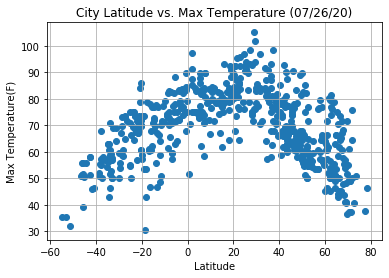

In [14]:
plt.scatter(latitudes, temperatures, marker='o')

plt.title("City Latitude vs. Max Temperature (07/26/20)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/lat_max_temp.png')
plt.show()

## Latitude vs. Humidity Plot

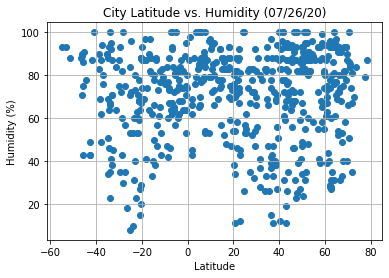

In [15]:
plt.scatter(latitudes, humidity, marker='o')

plt.title("City Latitude vs. Humidity (07/26/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/lat_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

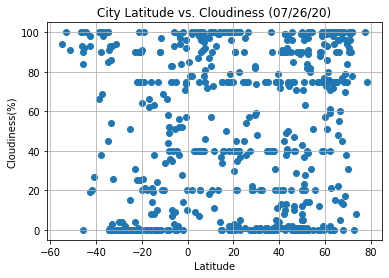

In [16]:
plt.scatter(latitudes, cloudiness, marker='o')

plt.title("City Latitude vs. Cloudiness (07/26/20)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/lat_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

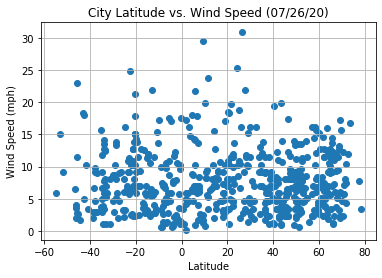

In [17]:
plt.scatter(latitudes, wind_speed, marker='o')

plt.title("City Latitude vs. Wind Speed (07/26/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/lat_wind_speed.png')
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [69]:
# Create Northern and Southern Hemisphere DataFrames
norther_weather_df=weather_df.loc[weather_df['Lat']>=0]
n_latitudes=norther_weather_df['Lat']
n_temperatures=norther_weather_df['Max Temp']
n_humidity=norther_weather_df['Humidity']
n_cloudiness=norther_weather_df['Cloudiness']
n_wind_speed=norther_weather_df['Wind Speed']

s_souther_weather_df=weather_df.loc[weather_df['Lat']<0]
s_latitudes=souther_weather_df['Lat']
s_temperatures=souther_weather_df['Max Temp']
s_humidity=souther_weather_df['Humidity']
s_cloudiness=souther_weather_df['Cloudiness']
s_wind_speed=souther_weather_df['Wind Speed']

# norther_weather_df.head()
# souther_weather_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39853461227413206


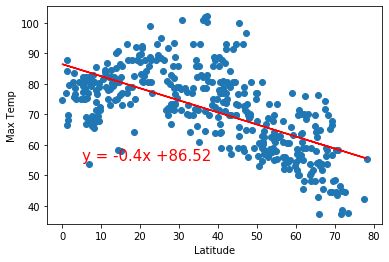

In [77]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_temperatures)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes,n_temperatures)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,55),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6164374867755709


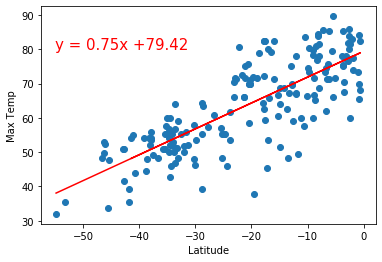

In [81]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_temperatures)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes,s_temperatures)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005101250319421484


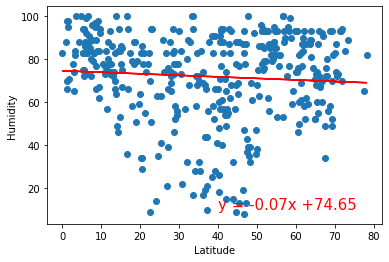

In [84]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_humidity)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes,n_humidity)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011247293701897176


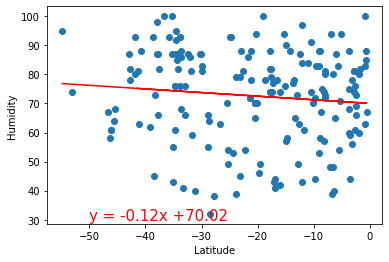

In [87]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_humidity)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes,s_humidity)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.141917152320586e-05


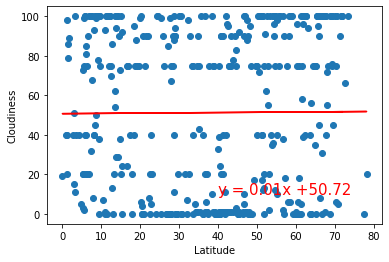

In [89]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_cloudiness)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes,n_cloudiness)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004711595956631444


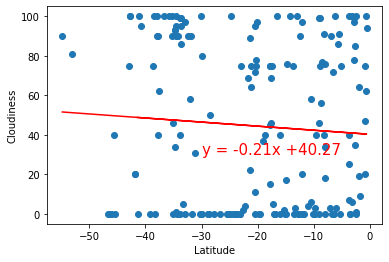

In [92]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_cloudiness)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes,s_cloudiness)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003099368327365178


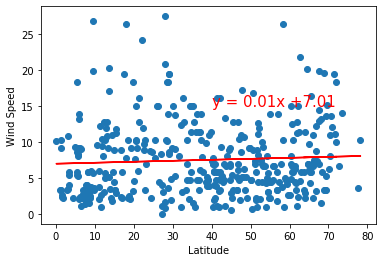

In [95]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_wind_speed)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes, n_wind_speed)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01257501925010261


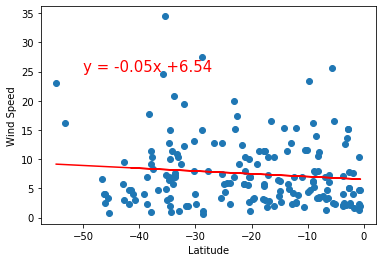

In [99]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_wind_speed)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes, s_wind_speed)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()